# Data Visualization
- word cloud
- regression plot
- map (menggunakan folium)
- waffle chart (optional)

## Regression Plot
biasanya data kalau kita plot secara scatter plot untuk cari korelasi antara dua set data, kita mau melihat korelasinya secara lebih konkrit, ada garis korelasi

garis korelasi ini namanya regression

garis ini dibuat menggunakan formula matematika yang menghubungkan kedua set data tersebut.

misalkan kita punya data:
- berat badan
- umur

garis regression bisa membuat formula `berat_badan = a * umur + b`

garis regression ini bisa kita lihat secara visual karena kita tau untuk setiap nilai umur yang ada, berat_badan nya berapa

In [4]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
# import data
df_can = pd.read_excel("https://github.com/stefkwan-h8/dataset/blob/main/Canada.xlsx?raw=true", 
                       sheet_name="Canada by Citizenship",
                       skipfooter=2,
                       skiprows=20)

df_can

# rapiin data
df_can = df_can.drop(columns=['Type', 'Coverage', 'AREA', 'AreaName','REG', 'RegName', 'DEV','DevName'])
df_can = df_can.rename(columns={"OdName":"Country"})

# bikin kolom total untuk total imigrasi
df_can["Total"] = df_can.sum(axis=1)
df_can.head()

C:\Users\stefa\AppData\Local\Temp\ipykernel_18856\480287409.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can["Total"] = df_can.sum(axis=1)


,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,1,0,0,0,0,0,1,2,2,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,80,67,71,69,63,44,69,132,242,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,1,1,0,0,0,0,1,1,15


In [9]:
# buat Country jadi index
df_can = df_can.set_index("Country")
df_can.head(3)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [6]:
years = range(1980, 2014)

In [17]:
df_can2 = df_can.T
df_can2 = df_can2.reset_index()
df_can2 = df_can2.rename(columns={"index":"year"})
df_can2 = df_can2.drop(index=34)
df_can2.tail()

Country,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
29,2009,1746,716,5393,0,0,62,38,467,267,...,8995,99,288,1,1353,2171,0,128,60,508
30,2010,1758,561,4752,0,0,61,27,459,252,...,8142,93,289,0,998,1942,0,211,102,494
31,2011,2203,539,4325,0,0,39,37,278,236,...,7676,81,162,0,1452,1723,0,160,69,434
32,2012,2635,620,3774,0,1,70,51,263,258,...,7891,47,235,0,1373,1731,0,174,46,437
33,2013,2004,603,4331,0,1,45,25,282,207,...,8501,58,167,0,1022,2112,0,217,59,407


<AxesSubplot:xlabel='China', ylabel='year'>

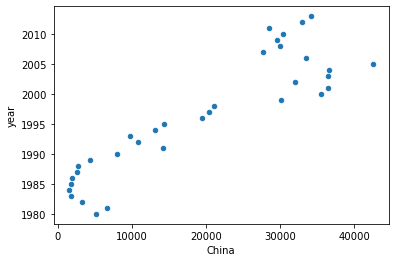

In [18]:
# misal, kita lihat korelasi antara jumlah imigran dengan tahun years nya
df_can2.plot(kind="scatter", x="China", y="year")

In [28]:
df_china = df_can2[["year","China"]]
df_china.head()

Country,year,China
0,1980,5123
1,1981,6682
2,1982,3308
3,1983,1863
4,1984,1527


In [29]:
# pastikan tipe data sudah numerik
df_china["year"] = pd.to_numeric(df_china["year"])

df_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    34 non-null     int64
 1   China   34 non-null     int64
dtypes: int64(2)
memory usage: 672.0 bytes


C:\Users\stefa\AppData\Local\Temp\ipykernel_18856\1377260037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china["year"] = pd.to_numeric(df_china["year"])


<AxesSubplot:xlabel='China', ylabel='year'>

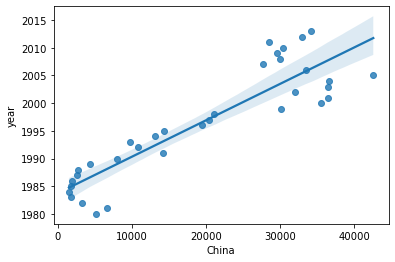

In [30]:
sns.regplot(x='China', y='year', data=df_china)

Text(0.5, 1.0, 'Tren jumlah imigran China ke Canada dari 1980-2013')

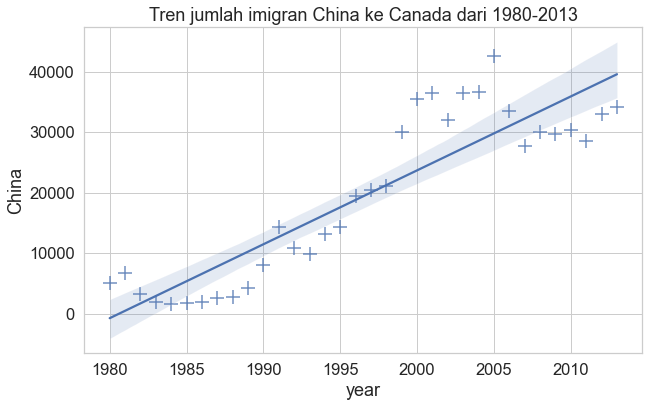

In [34]:
# opsi2 untuk mempercantik
plt.figure(figsize=(10, 6))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

sns.regplot(x='year', y='China', data=df_china, marker="+", scatter_kws={'s': 200})

plt.title("Tren jumlah imigran China ke Canada dari 1980-2013")